In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

2024-10-23 23:13:25.097369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 23:13:26.582686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


For when doing GPU work

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-23 23:13:30.382488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:30.825877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:30.825973: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


IPPR CNN Model 

Import image data from dataset containing 20000 positive images and 20000 negative images with each image being 227 x 227 pixels large. Kaggle link: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('Data', image_size=(227, 227), batch_size=128)

Found 40000 files belonging to 2 classes.


2024-10-23 23:13:33.729929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:33.730055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:33.730108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:35.329483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-23 23:13:35.329574: I tensorflow/compile

Shuffle the dataset before splitting the data into training, testing and validation sets.

In [4]:
shuffled_data = data.shuffle(buffer_size=100, reshuffle_each_iteration=False)

Splitting the dataset into training, testining and validation sets.

In [5]:
training_split_size = int(len(data)*.7)
testing_split_size = int(len(data)*.15)
validation_split_size = int(len(data)*.15)

In [6]:
training_set = shuffled_data.take(training_split_size)
testing_set = shuffled_data.skip(training_split_size).take(testing_split_size)
validation_set = shuffled_data.skip(training_split_size+testing_split_size).take(validation_split_size)

Model Building

In [7]:
model = Sequential()

model.add(tf.keras.Input(shape=(227,227,3)))
model.add(Conv2D(32, 9, strides = 2, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))




Compiling Model

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      7808      
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 16)      25104     
                                                                 
 max_pooling2d (MaxPooling2  (None, 52, 52, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                   

In [10]:
hist = model.fit(training_set, epochs = 25, validation_data = validation_set)

Epoch 1/25


2024-10-23 23:13:51.627360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-23 23:13:55.826834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-23 23:13:55.882785: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x340b0ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-23 23:13:55.882859: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-23 23:13:55.921220: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-23 23:13:56.200896: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

219/219 [==============================] - 49s 164ms/step - loss: 0.2153 - accuracy: 0.9412 - val_loss: 0.0712 - val_accuracy: 0.9720
Epoch 2/25
219/219 [==============================] - 31s 131ms/step - loss: 0.0719 - accuracy: 0.9740 - val_loss: 0.0552 - val_accuracy: 0.9806
Epoch 3/25
219/219 [==============================] - 30s 126ms/step - loss: 0.0526 - accuracy: 0.9808 - val_loss: 0.0501 - val_accuracy: 0.9817
Epoch 4/25
219/219 [==============================] - 30s 127ms/step - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.0755 - val_accuracy: 0.9740
Epoch 5/25
219/219 [==============================] - 30s 127ms/step - loss: 0.0400 - accuracy: 0.9865 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 6/25
219/219 [==============================] - 32s 132ms/step - loss: 0.0366 - accuracy: 0.9869 - val_loss: 0.0310 - val_accuracy: 0.9879
Epoch 7/25
219/219 [==============================] - 32s 135ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 0.0314 - val_accuracy: 0.9

Plotting training and validation loss

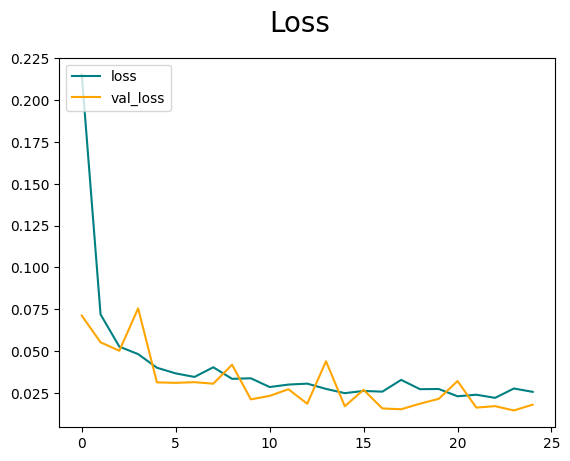

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

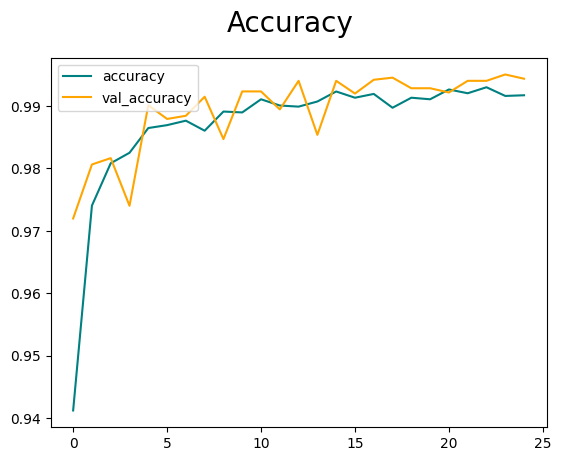

In [12]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()